In [1]:
ls

1512.04922.pdf                asobiba/
Applications/                 auto_music/
Desktop/                      c/
Documents/                    category_judge_app/
Downloads/                    creating_music/
Dropbox/                      datascience/
EDA_and_GraphicalLASSO.ipynb  deeplearning/
EM_Algorithm.ipynb            em.py
GCI/                          env/
GCI-team10/                   gengogaku/
Library/                      graph.ipynb
MLP_practice.ipynb            graph1.py
Movies/                       kaggle/
Music/                        kakomon/
PFA/                          modeling/
Pictures/                     risansyuho/
Public/                       scikit_learn_data/
R/                            users_2017_2_1.pickle
Untitled.ipynb                wealthnavi/
Untitled1.ipynb               五月祭資料/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv("data/2017/2017_data.csv", dtype="object")

In [335]:
df.head()

,KEY,SKEY,DUMMY00,AAF1,AAF2,AAF3,AAF3_01,AAF4,AAF5$1,AAF5$2,...,ICAA_W_01#147$2,ICAA_W_01#147$3,ICAA_W_01#147$4,ICAA_W_01#147$5,ICAA_W_01#147$6,ICAA_W_01#147$7,ICAA_W_01#147$8,ICAA_W_01#147$9,ICAA_W_01#147$10,ICAA_W_01#147$11
0,100000001,177100000030,,1,17,28,2,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,100000002,177100000012,,2,56,13,1,1,1,1,...,,,,,,,,,,
2,100000003,177100000044,,1,48,14,1,1,1,1,...,,,,,,,,,,
3,100000004,177100000011,,1,19,14,1,1,0,1,...,,,,,,,,,,
4,100000005,177100000092,,1,44,28,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [336]:
df.shape

(15042, 15745)

In [337]:
df.AAF1.describe()

count     15042
unique        2
top           2
freq       7583
Name: AAF1, dtype: object

In [338]:
df.AAF1.value_counts()

2    7583
1    7459
Name: AAF1, dtype: int64

In [339]:
df.describe()

KeyboardInterrupt: 

## 人生最大のピンチを取り出してみた

In [1]:
# count = 0
# for j, data in enumerate(df.AABG_A):
#     if len(data) > 5:
#         print(data)
#         count += 1

In [83]:
count

345

In [84]:
count / df.AABG_A.count()

0.022935779816513763

## さてじゃあ定量データで面白そうなのを取り出してガウシアングラフィカルモデルを適用してみよう

In [329]:
type(df["AAAY_weight"][0])

str

In [181]:
# 特徴的な定量, ないし順序尺度をリストアップしてみる

# 年齢: AAF2
# 転職回数: AAAI
# こづかい金額: AAAY_weight
# 世帯年収: AABA_weight
# 個人年収: AABB_weight
# 所有資産: AABC_weight
# 最近1年間の国内での宿泊旅行（仕事・出張以外): CAAB#1_weight
# ファッションにかける金額_洋服: CDAE#1_weight 2080
# ファッションにかける金額_バッグや財布などのレザー製品: CDAE#2_weight
# ファッションにかける金額_時計: CDAE#3_weight
# ファッションにかける金額_ジュエリー・アクセサリー: CDAE#4_weight
# 暮らしの余裕(現在): CEAH 2786
# # 順序尺度
# 暮らし向き変化: CEAI 2798
# #順序尺度
# 幸福度: AABD 2774
# 料理をする頻度: CGAF 3509
# 店舗利用頻度_マクドナルド: CGAK#2
# # これ, 12とか13の場合分けしないとやばそう
# 飲酒頻度_自宅: CGAN#2_weighted
# 健康自信度: CHAA 3871
# 休日のメディア利用時間数_テレビ: DBAB#1_weight 5211
# 休日のメディア利用時間数_インターネット: DBAB#8_weight 5218
# 休日のメディア利用時間数_据え置きゲーム: DBAB#9_weight
# 休日のメディア利用時間数_ソシャゲ: DBAB#10_weight
# 平日のインターネット利用時間数: HDAB#1_weight

In [363]:
# 特徴量がすぐにわかる辞書を作る.
column_dic = { "AAF2": "年齢", "AAAI": "転職回数", "AAAY_weight": "こづかい金額", "AABA_weight": "世帯年収_weight", "AABB_weight": "個人年収", "AABC_weight": "所有資産", "CEAH": "暮らしの余裕(現在)", "CEAI": "暮らし向き変化", "AABD": "幸福度" }
column_dic["CAAB#1_weight"] = "最近1年間の国内での宿泊旅行（仕事・出張以外）"
column_dic["CDAE#1_weight"] = "ファッションにかける金額_洋服"
column_dic["CDAE#2_weight"] = "ファッションにかける金額_バッグや財布などのレザー製品"
column_dic["CDAE#3_weight"] = "ファッションにかける金額_時計"
column_dic["CDAE#4_weight"] = "ファッションにかける金額_ジュエリー・アクセサリー"
column_dic["CGAF"] = "料理をする頻度"
column_dic["CGAK#2"] = "店舗利用頻度_マクドナルド"
column_dic["CGAN#2_weight"] = "飲酒頻度_自宅"
column_dic["CHAA"] = "健康自信度"
column_dic["DBAB#1_weight"] = "休日のメディア利用時間数_テレビ"
column_dic["DBAB#8_weight"] = "休日のメディア利用時間数_インターネット"
column_dic["DBAB#9_weight"] = "休日のメディア利用時間数_据え置きゲーム"
column_dic["DBAB#10_weight"] = "休日のメディア利用時間数_ソシャゲ"
column_dic["HDAB#1_weight"] = "平日のインターネット利用時間数"

In [364]:
list(column_dic.values())

['年齢',
 '転職回数',
 'こづかい金額',
 '世帯年収_weight',
 '個人年収',
 '所有資産',
 '暮らしの余裕(現在)',
 '暮らし向き変化',
 '幸福度',
 '最近1年間の国内での宿泊旅行（仕事・出張以外）',
 'ファッションにかける金額_洋服',
 'ファッションにかける金額_バッグや財布などのレザー製品',
 'ファッションにかける金額_時計',
 'ファッションにかける金額_ジュエリー・アクセサリー',
 '料理をする頻度',
 '店舗利用頻度_マクドナルド',
 '飲酒頻度_自宅',
 '健康自信度',
 '休日のメディア利用時間数_テレビ',
 '休日のメディア利用時間数_インターネット',
 '休日のメディア利用時間数_据え置きゲーム',
 '休日のメディア利用時間数_ソシャゲ',
 '平日のインターネット利用時間数']

In [365]:
a = "AABA_weight"
df[a].describe()

count     15042
unique       16
top         450
freq       1762
Name: AABA_weight, dtype: object

(array([2343., 1108., 2489., 1762., 2431., 1152., 1654., 1415.,  311.,
         377.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

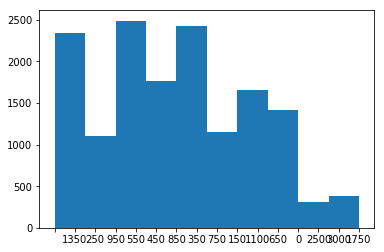

In [366]:
plt.hist(list(df[a]))

In [423]:
features = list(column_dic.keys())
cut_df = df[features]

In [424]:
cut_df.head()

,AAF2,AAAI,AAAY_weight,AABA_weight,AABB_weight,AABC_weight,CEAH,CEAI,AABD,CAAB#1_weight,...,CDAE#4_weight,CGAF,CGAK#2,CGAN#2_weight,CHAA,DBAB#1_weight,DBAB#8_weight,DBAB#9_weight,DBAB#10_weight,HDAB#1_weight
0,17,,2.5,,,,4,3,5,,...,25000,6,9,,2,150,150,0,150,210
1,56,6,5.5,1350,950,900,2,3,6,0,...,40000,1,11,6.5,3,150,0,0,0,22.5
2,48,6,.75,1350,1350,250,3,3,6,4,...,1500,5,8,.2,3,22.5,22.5,0,0,37.5
3,19,,3.5,,,,2,2,8,,...,1500,5,8,,2,210,150,52.5,90,210
4,44,2,2.5,250,250,250,3,3,6,2,...,1500,4,6,6.5,4,210,52.5,0,7.5,150


## とりあえずデータを取り出したのでこれからはデータ整形をしていく.

In [369]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/(xstd + 0.00001)
    return zscore

from sklearn.covariance import GraphLassoCV

In [370]:
import sklearn

In [371]:
sklearn.__version__

'0.19.1'

In [372]:
cut_df.shape

(15042, 23)

In [373]:
# これでNANがあれば取り除ける
cut_df = cut_df.dropna()

In [374]:
cut_df.shape

(15042, 23)

なに、欠損値がこれで減っていない...だと... つまり見えないところにはNANではなく何かしらの違う数値が入っている。

### まずはAAAI(転職回数)を綺麗にする

In [375]:
cut_df["AAAI"].value_counts()

     4938
6    3377
1    1650
5    1638
3    1421
2    1335
4     683
Name: AAAI, dtype: int64

In [376]:
cut_df.loc[cut_df.AAAI == " ", "AAAI"] = 0  # AAAI 転職回数の欠損値を埋める
cut_df.loc[cut_df.AAAI == "6", "AAAI"] = 0  # アンケートによると6は転職したことがない人らしい

In [377]:
# なんと恐ろしいことに1 ~ 5はstr型になっているのでそれを直す
a = ["0", "1", "2", "3", "4", "5"]
for aa in a:
    cut_df.loc[cut_df.AAAI == aa, "AAAI"] = int(aa)

In [422]:
cut_df.head()

,AAF2,AAAI,AAAY_weight,AABA_weight,AABB_weight,AABC_weight,CEAH,CEAI,AABD,CAAB#1_weight,...,CDAE#4_weight,CGAF,CGAK#2,CGAN#2_weight,CHAA,DBAB#1_weight,DBAB#8_weight,DBAB#9_weight,DBAB#10_weight,HDAB#1_weight
0,17,0,2.5,0,0,0,4,3,5,0,...,25000,6,9,0,2,150,150,0,150,210
1,56,0,5.5,1350,950,900,2,3,6,0,...,40000,1,11,6.5,3,150,0,0,0,22.5
2,48,0,0.75,1350,1350,250,3,3,6,4,...,1500,5,8,0.2,3,22.5,22.5,0,0,37.5
3,19,0,3.5,0,0,0,2,2,8,0,...,1500,5,8,0,2,210,150,52.5,90,210
4,44,2,2.5,250,250,250,3,3,6,2,...,1500,4,6,6.5,4,210,52.5,0,7.5,150


In [379]:
## というわけでAAAIは綺麗になった
cut_df["AAAI"].value_counts()

0    8315
1    1650
5    1638
3    1421
2    1335
4     683
Name: AAAI, dtype: int64

[]

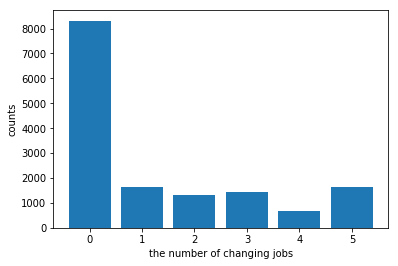

In [380]:
## ヒストグラムにするとこんな感じ
plt.hist(list(cut_df["AAAI"]), align="mid", bins=6, rwidth=0.8, range=[-0.5, 5.5])
plt.xlabel("the number of changing jobs")
plt.ylabel("counts")
plt.plot()

### ちょっと埒が明かないので一括でやることにする

In [425]:
mat = cut_df.values

In [426]:
mat.shape

(15042, 23)

In [427]:
mat[0]

array(['17', ' ', '2.5', ' ', ' ', ' ', '4', '3', '5', ' ', '4000',
       '6500', '9000', '25000', '6', '9', ' ', '2', '150', '150', '0',
       '150', '210'], dtype=object)

In [430]:
for i in range(len(mat)):
    for j in range(len(mat[i])):
        # " "という空白データは一旦全て0としてしまう. あとでこれで良いか考えよう
        if mat[i][j] == " ":
            mat[i][j] = np.float(0)
        else:
            mat[i][j] = np.float(mat[i][j])

In [431]:
mat[0]

array([17.0, 0.0, 2.5, 0.0, 0.0, 0.0, 4.0, 3.0, 5.0, 0.0, 4000.0, 6500.0,
       9000.0, 25000.0, 6.0, 9.0, 0.0, 2.0, 150.0, 150.0, 0.0, 150.0,
       210.0], dtype=object)

In [432]:
mat.shape

(15042, 23)

In [433]:
type(mat[0][0])

float

In [437]:
# この変換がないとnp.stdがバグる
mat = np.array(mat, dtype=np.float64)

In [438]:
mat = zscore(mat, axis=0)

In [439]:
mat[0]

array([-1.74023864, -1.0924228 ,  0.03051469, -1.30345991, -0.95154328,
       -0.51373397,  1.23010901, -0.20035845, -0.89910279, -0.7122339 ,
       -0.22194848, -0.37177189, -0.47099652,  0.12732754,  1.01480265,
        0.52560676, -0.66971758, -1.18507039, -0.24974666, -0.03294903,
       -0.34655336,  1.52601185,  0.16448712])

という感じで「人」を23次元の変数の塊として表現することができるようになった.

#### ちなみに・・・

In [393]:
a = np.array([[1, 3, 4], [2, 3, 6]])

In [394]:
a

array([[1, 3, 4],
       [2, 3, 6]])

In [396]:
zscore(a, axis=0)  # 列ごとに標準化

array([[-0.99998,  0.     , -0.99999],
       [ 0.99998,  0.     ,  0.99999]])

In [397]:
zscore(a, axis=1)  # 行ごとに標準化

array([[-1.3362955 ,  0.2672591 ,  1.0690364 ],
       [-0.98057491, -0.39222996,  1.37280487]])

### ではGraphical LASSOをやってみよう

In [453]:
from sklearn.covariance import GraphLasso

In [454]:
len(mat)

15042

In [455]:
# まず標本共分散行列(今は各列ごとに標準化しているので相関係数)を見てみる
emp_cov = np.dot(mat.T, mat) / len(mat)

In [456]:
emp_cov.shape

(23, 23)

In [457]:
%precision 1
emp_cov

array([[ 1.0e+00,  1.2e-01,  1.2e-01,  3.6e-01,  3.0e-01,  3.2e-01,
        -3.3e-02,  9.7e-02,  4.0e-02,  7.6e-02,  1.0e-01,  7.2e-02,
         1.5e-01,  1.5e-01, -2.4e-01,  2.0e-01,  3.2e-01,  5.8e-02,
         1.9e-01, -1.4e-02, -1.7e-01, -2.3e-01, -5.1e-02],
       [ 1.2e-01,  1.0e+00,  1.9e-01,  2.7e-01,  4.4e-01,  3.3e-02,
        -2.4e-03, -2.1e-02, -3.3e-02,  6.2e-02,  3.7e-02,  2.8e-02,
         8.3e-02,  3.0e-02,  1.2e-01,  7.8e-04,  1.2e-01, -2.2e-02,
         1.0e-02, -9.4e-03, -1.8e-02, -3.8e-02, -7.2e-02],
       [ 1.2e-01,  1.9e-01,  1.0e+00,  3.1e-01,  3.7e-01,  2.2e-01,
        -2.4e-01, -1.4e-01,  9.0e-02,  2.2e-01,  1.9e-01,  2.2e-01,
         2.4e-01,  1.8e-01,  1.3e-01, -1.8e-02,  1.5e-01, -1.1e-01,
         3.0e-02,  3.5e-02, -3.2e-02, -5.9e-02,  2.1e-02],
       [ 3.6e-01,  2.7e-01,  3.1e-01,  1.0e+00,  5.9e-01,  3.7e-01,
        -2.7e-01, -1.1e-01,  1.7e-01,  1.8e-01,  1.9e-01,  2.5e-01,
         2.9e-01,  2.4e-01, -8.5e-02,  3.5e-02,  1.8e-01, -8.1e-02,
       

In [470]:
model = GraphLasso(alpha=0.1)
model.fit(mat)

GraphLasso(alpha=0.1, assume_centered=False, enet_tol=0.0001, max_iter=100,
      mode='cd', tol=0.0001, verbose=False)

In [492]:
cov = model.covariance_
pre = model.precision_

In [493]:
# 正方行列と X および Y のラベルの行列を渡す
def draw_heatmap(data, row_labels, column_labels):
    # 描画する
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    plt.show()
    plt.savefig('image.png')

    return heatmap

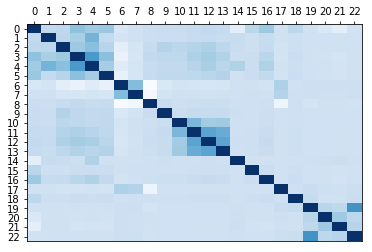

<Figure size 432x288 with 0 Axes>

In [495]:
# まずは共分散行列をそのままプロットしてみる
a = list(range(23))
draw_heatmap(cov, a, a)

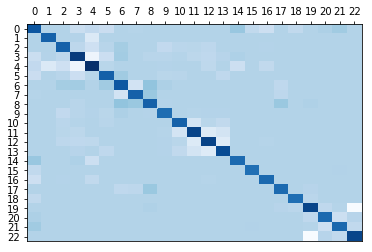

<Figure size 432x288 with 0 Axes>

In [496]:
# 次に精度行列(共分散行列の逆行列)を見てみる
draw_heatmap(pre, a, a)

In [500]:
import networkx as nx
%precision 3
G = nx.Graph()
for i in range(len(pre)):
    for j in range(len(pre)):
        if abs(pre[i][j]) > 0.10:
            G.add_edge(i, j)

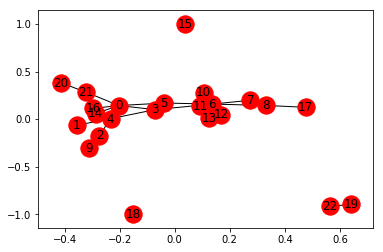

In [508]:
nx.draw_networkx(G)
plt.show()

In [509]:
for j, a in enumerate(list(column_dic.values())):
    print(j, a)

0 年齢
1 転職回数
2 こづかい金額
3 世帯年収_weight
4 個人年収
5 所有資産
6 暮らしの余裕(現在)
7 暮らし向き変化
8 幸福度
9 最近1年間の国内での宿泊旅行（仕事・出張以外）
10 ファッションにかける金額_洋服
11 ファッションにかける金額_バッグや財布などのレザー製品
12 ファッションにかける金額_時計
13 ファッションにかける金額_ジュエリー・アクセサリー
14 料理をする頻度
15 店舗利用頻度_マクドナルド
16 飲酒頻度_自宅
17 健康自信度
18 休日のメディア利用時間数_テレビ
19 休日のメディア利用時間数_インターネット
20 休日のメディア利用時間数_据え置きゲーム
21 休日のメディア利用時間数_ソシャゲ
22 平日のインターネット利用時間数


In [5]:
from IPython.display import display_svg

In [504]:
svg = nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')
display_svg(svg, raw=True)

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [2]:
pre = np.load("pre.npy")

In [3]:
import networkx as nx

In [4]:
G = nx.Graph()
for i in range(len(pre)):
    for j in range(len(pre)):
        if i == j:
            continue
        if abs(pre[i][j]) > 0.10:
            G.add_edge(i, j)

In [5]:
from IPython.display import display_svg

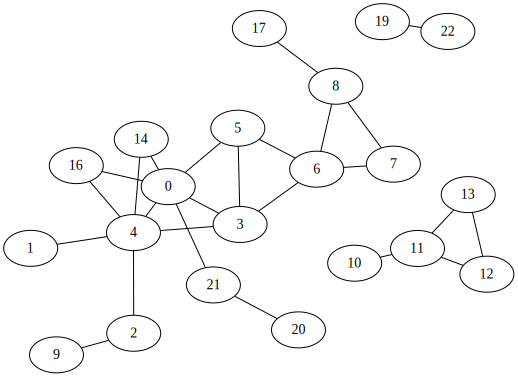

In [6]:
svg = nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')
display_svg(svg, raw=True)

In [7]:
mat = np.load("mat.npy")

In [8]:
mat.shape

(15042, 23)

In [9]:
mat[0]

array([-1.74023864, -1.0924228 ,  0.03051469, -1.30345991, -0.95154328,
       -0.51373397,  1.23010901, -0.20035845, -0.89910279, -0.7122339 ,
       -0.22194848, -0.37177189, -0.47099652,  0.12732754,  1.01480265,
        0.52560676, -0.66971758, -1.18507039, -0.24974666, -0.03294903,
       -0.34655336,  1.52601185,  0.16448712])

In [10]:
from sklearn.covariance import GraphLassoCV

In [11]:
import sklearn
sklearn.__version__

'0.19.0'

In [12]:
mat.shape

(15042, 23)

In [13]:
model_cv = GraphLassoCV()

In [14]:
model_cv.fit(mat)

GraphLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
       max_iter=100, mode='cd', n_jobs=1, n_refinements=4, tol=0.0001,
       verbose=False)

In [15]:
pre = model_cv.precision_

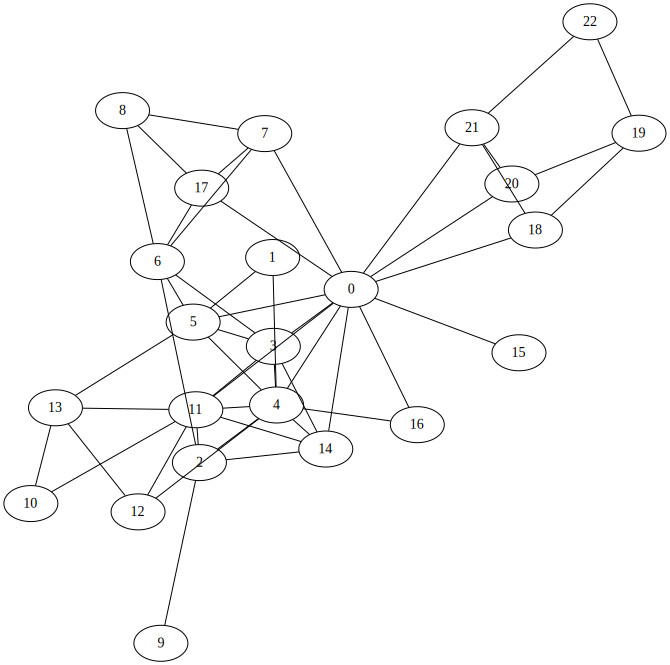

In [32]:
import networkx as nx
G = nx.Graph()
for i in range(len(pre)):
    for j in range(len(pre)):
        if i == j:
            continue
        if abs(pre[i][j]) > 0.10:
            G.add_edge(i, j)
from IPython.display import display_svg
svg = nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')
display_svg(svg, raw=True)

In [22]:
model_cv.cv_alphas_

[0.617090611449493,
 0.13294814201997737,
 0.02864280891431247,
 0.006170906114494929,
 0.004269223968640627,
 0.003822512717760621,
 0.003422543203348079,
 0.0030644245928491114,
 0.0029535813632950423,
 0.0027437778071207537,
 0.002456681972992852,
 0.002043379062256485,
 0.0014136729205963307,
 0.0009780227092179678,
 0.0003893578535038306,
 0.00015500615339119313,
 0]

In [ ]:
x = model_cv.cv_alphas_
y = model_cv.grid_scores_

In [24]:
model_cv.grid_scores_

array([[-33.21748381, -32.23748979, -32.53298967],
       [-31.42211542, -30.57559207, -30.89368205],
       [-31.01314057, -30.11302109, -30.45865567],
       [-30.9829372 , -30.05920602, -30.40374915],
       [-30.98362313, -30.05706065, -30.40173089],
       [-30.98390877, -30.05666027, -30.4014224 ],
       [-30.9842455 , -30.05635235, -30.40119588],
       [-30.98460932, -30.05611305, -30.40103858],
       [-30.98473421, -30.05604459, -30.40099982],
       [-30.98498703, -30.05592964, -30.40093776],
       [-30.98537849, -30.05578909, -30.40086977],
       [-30.98601153, -30.05561667, -30.40080795],
       [-30.98712225, -30.05550217, -30.40086255],
       [-30.98802891, -30.05551416, -30.40103081],
       [-30.98946265, -30.05563245, -30.40135492],
       [-30.99010217, -30.05573564, -30.40151865],
       [-31.05625751, -30.06900376, -30.43685193]])

In [47]:
from sklearn.covariance import GraphLasso
from sklearn.model_selection import train_test_split

mat_train, mat_test = train_test_split(mat)
print("train shape", mat_train.shape, "test shape", mat_test.shape)
model = GraphLasso()
model.fit(mat)
model.score(mat_test)

train shape (11281, 23) test shape (3761, 23)


-30.526286340501358

最も良かった正則化係数は:  0.26
このときグラフは次のようになる


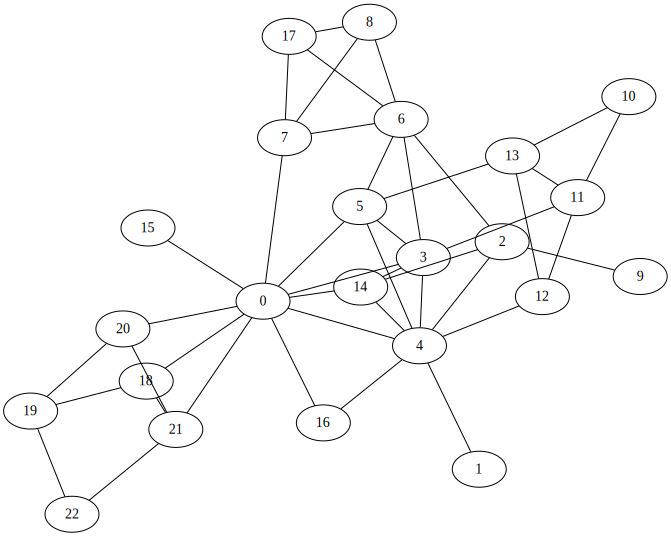

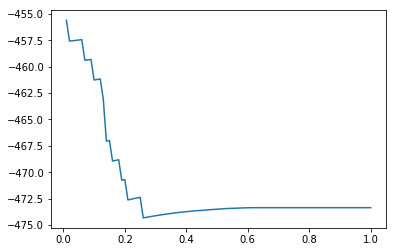

In [85]:
# sklearnだとデフォルトでは対数尤度しか計算してくれないので自分で情報量基準を使って計算してみる。

# 精度行列で絶対値がthetaより小さいところが何個あるか数える関数
def count_zeros(X, theta=0.10):
    count = 0
    for i in range(len(X)):
        for j in range(len(X[i])):
            if X[i][j] < theta:
                count += 1
    return count

from sklearn.covariance import GraphLasso
# from sklearn.model_selection import train_test_split
# mat_train, mat_test = train_test_split(mat)

# 正則化パラメータの値
alphas = np.linspace(0.01, 1.0, num=100)
aics = []
for alpha in alphas:
    model = GraphLasso(alpha=alpha)
    model.fit(mat)
    
    # 辺がない個数を数える。thetaはハイパーパラメータ
    sparsity = count_zeros(model.precision_, theta=0.10)
    
    # aicは以下で計算する。小さいほど嬉しい。（情報量として見るべき）
    aic = - model.score(mat) - sparsity
    aics.append(aic)

aics = np.array(aics)
best_alpha = alphas[aics.argmin()]
print("最も良かった正則化係数は: ", best_alpha)
print("このときグラフは次のようになる")
model = GraphLasso(alpha = best_alpha)
model.fit(mat)

import networkx as nx
G = nx.Graph()
for i in range(len(pre)):
    for j in range(len(pre)):
        if i == j:
            continue
        if abs(pre[i][j]) > 0.10:
            G.add_edge(i, j)
from IPython.display import display_svg
svg = nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')
display_svg(svg, raw=True)

plt.plot(alphas, aics)
plt.show()

In [88]:
nx.draw(G)
plt.savefig("path_to_fig.png")

In [112]:
import pygraphviz as pgv
a = nx.nx_agraph.to_agraph(G)
a.draw('file.pdf', prog="neato")

In [105]:
a.write("graph.dot")

In [103]:
type(G)

networkx.classes.graph.Graph

In [92]:
nx.__version__

'2.2'

In [98]:
G.nodes

NodeView((0, 3, 4, 5, 7, 14, 15, 16, 18, 20, 21, 1, 2, 6, 9, 11, 12, 13, 8, 17, 10, 19, 22))

In [61]:
aics

[-455.59646609949147,
 -457.57120260604006,
 -457.54078931295436,
 -457.5067669454316,
 -457.47157084549235,
 -457.4334196905562,
 -459.39460462478365,
 -459.3536532291047,
 -459.30923620645393,
 -461.26101949538406,
 -461.21129462005405,
 -461.16048434284727,
 -463.1095200425108,
 -467.05607010124737,
 -467.0008010240842,
 -468.94346882811783,
 -468.8841022485738,
 -468.8234732838728,
 -470.759948309873,
 -470.6954931394487,
 -472.62987264691066,
 -472.5649573255084,
 -472.5006114378666,
 -472.4410191830055,
 -472.3887342878714,
 -474.3348268978435,
 -474.28057303790223,
 -474.22816971941364,
 -474.1768245134598,
 -474.12828828795637,
 -474.08059217088424,
 -474.0349979988366,
 -473.994522175853,
 -473.9538502441001,
 -473.9121822101778,
 -473.8705982788435,
 -473.83349345886865,
 -473.8021059714234,
 -473.7716440458599,
 -473.7436942423908,
 -473.71586236526036,
 -473.68843607044903,
 -473.66354619657574,
 -473.6393977047602,
 -473.61775451543787,
 -473.5955725362187,
 -473.572824308

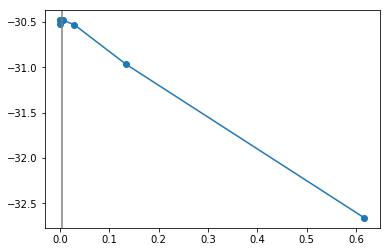

In [28]:
# scoreはlog likelihoodになっている. AICとかだとどうなる？
plt.plot(model_cv.cv_alphas_, np.mean(model_cv.grid_scores_, axis=1), 'o-')
plt.axvline(model_cv.alpha_, color='.5')
plt.show()

In [35]:
model_cv.get_params()

{'alphas': 4,
 'assume_centered': False,
 'cv': None,
 'enet_tol': 0.0001,
 'max_iter': 100,
 'mode': 'cd',
 'n_jobs': 1,
 'n_refinements': 4,
 'tol': 0.0001,
 'verbose': False}

In [36]:
model

NameError: name 'model' is not defined

In [71]:
a = np.linspace(0, 5, 6)

In [72]:
a

array([0., 1., 2., 3., 4., 5.])

In [74]:
a.max()

5.0

In [75]:
a.argmax()

5